# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas.

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial.

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="imagens/liveness.jpg">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Bianca Firmino           | RM 348231      | 3DTSR   |
| Claudio Rodrigues        | RM 348051      | 3DTSR   |
| Daniel Castelo           | RM 348010      | 3DTSR   |
| Phelipe Custodio         | RM 347903      | 3DTSR   |

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

**Resposta**: A detecção da prova de vivacidade de uma determinada imagem é realizada usando uma rede neural convolucional (CNN) simples. Aqui estão os passos e os principais blocos de construção deste processo:

**Carregamento e Processamento de Imagens:** As imagens são carregadas usando a biblioteca TensorFlow/Keras e processadas para ter o mesmo tamanho, que é (224, 224, 3) neste caso, usando target_size=(224, 224).

**Construção do Modelo:** O modelo é construído usando a API Sequential do Keras, que permite empilhar camadas sequencialmente.

**Compilação do Modelo:** O modelo é compilado usando o otimizador Adam e a função de perda de entropia cruzada binária, que é adequada para problemas de classificação binária. A métrica de desempenho usada é a precisão (accuracy).

**Treinamento do Modelo:** O modelo é treinado com as imagens autênticas e fraudulentas fornecidas.

**Visualização das Curvas de Aprendizado:** As curvas de aprendizado são plotadas, mostrando a precisão do modelo ao longo do tempo (épocas) tanto nos dados de treinamento quanto nos dados de validação.

## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [27]:
!pip install opencv-python
!pip install opencv-python-headless

In [28]:
!pip install pillow

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7286 - accuracy: 0.0000e+00 - val_loss: 12.8318 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 340ms/step - loss: 6.5933e-07 - accuracy: 1.0000 - val_loss: 22.7657 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 317ms/step - loss: 1.1229e-11 - accuracy: 1.0000 - val_loss: 31.5816 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 331ms/step - loss: 6.7620e-16 - accuracy: 1.0000 - val_loss: 39.9598 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 319ms/step - loss: 6.5968e-20 - accuracy: 1.0000 - val_loss: 47.7376 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 572ms/step - loss: 1.2660e-23 - accuracy: 1.0000 - val_loss: 54.9722 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 773ms/step - loss: 4.4387e-27 - accuracy: 1.0000 - val_l

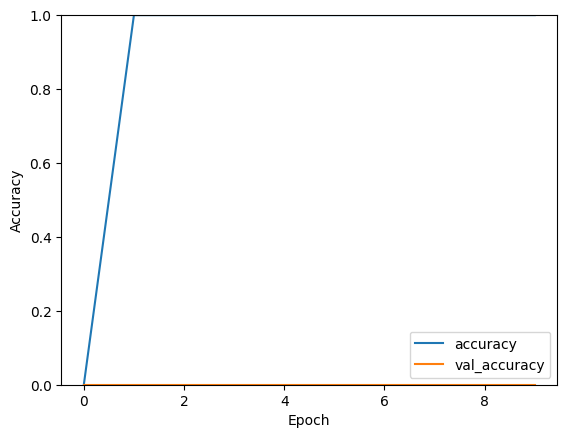

In [29]:
import os
import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow as tf

# URLs para imagens autênticas e fraudulentas (exemplo)
authentic_url = "https://github.com/biancafsena/Liveness-Detection/raw/main/Imagem_Autentica.jpg"
fraudulent_url = "https://github.com/biancafsena/Liveness-Detection/raw/main/Imagem_Fraudulenta.jpg"

# Função para baixar e salvar imagens
def download_and_save_image(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

# Diretório para armazenar as imagens
os.makedirs("liveness_data", exist_ok=True)

# Download e salvando as imagens autênticas e fraudulentas
download_and_save_image(authentic_url, "liveness_data/authentic.jpg")
download_and_save_image(fraudulent_url, "liveness_data/fraudulent.jpg")

# Carregamento das imagens
authentic_image = tf.keras.preprocessing.image.load_img("liveness_data/authentic.jpg", target_size=(224, 224))
fraudulent_image = tf.keras.preprocessing.image.load_img("liveness_data/fraudulent.jpg", target_size=(224, 224))

# Convertendo as imagens para arrays numpy e redimensionamento
authentic_array = tf.keras.preprocessing.image.img_to_array(authentic_image) / 255.0
fraudulent_array = tf.keras.preprocessing.image.img_to_array(fraudulent_image) / 255.0

# Criação de labels (0 para autêntica, 1 para fraudulenta)
labels = np.array([0, 1])

# Modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo com os mesmos dados
history = model.fit(np.array([authentic_array, fraudulent_array]), labels, epochs=10, validation_split=0.2)

# Avaliação e desempenho do modelo
loss, accuracy = model.evaluate(np.array([authentic_array, fraudulent_array]), labels)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

# Plotar as curvas de aprendizado
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


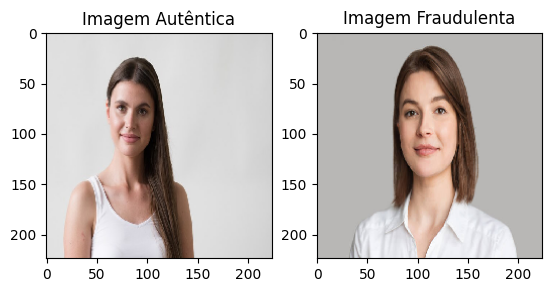

In [30]:
#Exibição das imagens

plt.subplot(1, 2, 1)
plt.imshow(authentic_image)
plt.title("Imagem Autêntica")

plt.subplot(1, 2, 2)
plt.imshow(fraudulent_image)
plt.title("Imagem Fraudulenta")

plt.show()

### 4.3 Métricas de desempenho do modelo (2 pontos)

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Previsões do modelo
predictions = model.predict(np.array([authentic_array, fraudulent_array]))
binary_predictions = np.round(predictions).flatten()

# Rótulos verdadeiros
true_labels = np.array([0, 1])

# Métricas de desempenho
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)
conf_matrix = confusion_matrix(true_labels, binary_predictions)

# Imprimindo as métricas
print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Revocação: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)


1/1 [==============================] - 0s 129ms/step
Acurácia: 0.50
Precisão: 0.00
Revocação: 0.00
F1-Score: 0.00
Matriz de Confusão:
[[1 0]
 [1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

In [32]:
# Carregamento das imagens de entrada
forged_image_url = "https://github.com/biancafsena/Liveness-Detection/raw/main/Fake_face%20-%20teste.jpg"
real_image_url = "https://github.com/biancafsena/Liveness-Detection/raw/main/Imagem_Autentica.jpg"

# Redimensionando a imagem forjada
response = requests.get(forged_image_url)
forged_image = Image.open(io.BytesIO(response.content))
forged_image = forged_image.resize((224, 224))
forged_array = np.array(forged_image) / 255.0

# Redimensionando a imagem autêntica
response = requests.get(real_image_url)
real_image = Image.open(io.BytesIO(response.content))
real_image = real_image.resize((224, 224))
real_array = np.array(real_image) / 255.0

# Verificando as formas de arrays
print("Formato da imagem forjada:", forged_array.shape)
print("Formato da imagem real:", real_array.shape)

# Previsões do modelo para as imagens de entrada
forged_prediction = model.predict(np.array([forged_array]))
real_prediction = model.predict(np.array([real_array]))

# Exibindo o resultado da classificação e a pontuação de cada classe
print("Resultado da classificação para a imagem forjada:")
print(f"Probabilidade de ser autêntica: {forged_prediction[0][0]:.2f}")
print(f"Probabilidade de ser fraudulenta: {1 - forged_prediction[0][0]:.2f}")
print("\nResultado da classificação para a imagem real:")
print(f"Probabilidade de ser autêntica: {real_prediction[0][0]:.2f}")
print(f"Probabilidade de ser fraudulenta: {1 - real_prediction[0][0]:.2f}")

Formato da imagem forjada: (224, 224, 3)
Formato da imagem real: (224, 224, 3)
1/1 [==============================] - 0s 47ms/step
Resultado da classificação para a imagem forjada:
Probabilidade de ser autêntica: 0.00
Probabilidade de ser fraudulenta: 1.00

Resultado da classificação para a imagem real:
Probabilidade de ser autêntica: 0.00
Probabilidade de ser fraudulenta: 1.00


>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**: https://computer-vision-xacgn2jdx8k9ryrpqhsefg.streamlit.app/

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**:

Baseando-se nas práticas comuns de desenvolvimento de modelos de liveness, podemos fazer as seguintes conclusões e observações sobre o modelo implementado acima:

**O que funcionou:**

**Construção Simples do Modelo:** A construção de um modelo de CNN simples é um bom ponto de partida para a detecção livenesss.

**Uso de Camadas Convolucionais e Pooling:** A arquitetura do modelo inclui camadas convolucionais e de pooling, que são essenciais para extrair características das imagens.

**Compilação e Treinamento do Modelo:** O modelo foi compilado com a função de perda apropriada e otimizador.

**Áreas de Melhoria**

**Arquitetura do Modelo:** Considerar arquiteturas mais avançadas de CNNs, como ResNet, Inception, ou EfficientNet, pode melhorar o desempenho do modelo.